# Assignment 6 Knock Airport Weather
## Assignment on Time Series
### Author: Gerry Callaghan


In [1]:
# We'll start with importing all our packages

# we'll need pandas for importing our data into dataframes
import pandas as pd

# We'll need numpy for various operations on our dataframes
import numpy as np

# We'll need datetime to reformat the dates for our data 
import datetime as dt

# We'll need matplotlib for charting our regressions
import matplotlib.pyplot as plt


Let's import the source csv file. <br/>
This file is from: https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv <br/>
it comes from this source: https://data.gov.ie/dataset/knock-airport-hourly-data/resource/d0aaf256-6854-4447-90bf-944b09105e40<br/>
so the various headers and legend keys can be read about on this site.

In [2]:
# Let's read in our data from the URL down into csv file, we do this as follows:
# We start by assigning our URL variable the actual URL in a string format
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv" 

# Before we import the CSV file here, we initially download the csv from an internet browser and try to open it with Excel.
# This tells us there are a lot of columns, most of which we don't need for the objectives of this exercise.
# It also tells us that the data does not start until row 24.

# Let's assign temporary names of "extras" so the superfluous columns 
# (we will be removing them shortly but this way, we can ensure our headings are aligned correctly)
names = ["date","extra1","rain","extra2","temp","extra5","wetb","dewpt","vappr","rhum","msl","extra3","extra4","wdsp","wddir","ww","w","sun","vis","clht","clamt","cloud_amount"]


# We pass in the URL string to the read_csv function, 
# and set our dataframe df equal to the data, from row 24 onwards
# and on import assign the names to the relevant columns
df = pd.read_csv(url, header=None,names=names,skiprows=24)

#just to get a preview of that data
print(f"{df.head()}\n")


                date  extra1 rain  extra2  temp  extra5  wetb  dewpt  vappr  \
0  10-apr-1996 14:00       0  0.0       0  11.5       0   8.1    3.9    0.0   
1  31-jul-1996 08:00       0  0.0       0  11.5       0  11.1   10.7    0.0   
2  31-jul-1996 09:00       0  0.0       0  11.6       0  10.7    9.8    0.0   
3  31-jul-1996 10:00       0  0.0       0  12.9       0  11.3    9.8    0.0   
4  31-jul-1996 11:00       0  0.0       0  14.5       0  10.8    7.0    0.0   

   rhum  ... extra4  wdsp wddir  ww   w  sun    vis  clht clamt cloud_amount  
0     0  ...      0     0     0  25  81  0.0  35000    32     5          NaN  
1     0  ...      0     0     0  25  82  0.0  40000    45     5          NaN  
2     0  ...      0     0     0  80  81  0.0   8000    32     7          NaN  
3     0  ...      0     0     0  25  82  0.0  28000    35     6          NaN  
4     0  ...      0     0     0   2  11  0.0  40000    40     6          NaN  

[5 rows x 22 columns]



/tmp/ipykernel_49304/2208107076.py:17: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, header=None,names=names,skiprows=24)


In [3]:
# Let's drop those superfluous columns 
# We create a drop_col_list variable and assign it to the value of an array containing all the columns (series) we want to remove from our dataframe
drop_col_list = ['extra1', 'rain', 'extra2', 'extra5', 'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'extra3', 'extra4', 'wdsp', 'wddir', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt', 'cloud_amount']

# now we will use the drop function in pandas, setting the columns equal to our variable, 
# and selecting in place so it removes them in the source dataframe.
df.drop(columns=drop_col_list, inplace=True)

# Let's now view the list of columns
# We create a variable called headers, and assign it equal to the list of the columns before printing the value of the variable
headers = df.columns.tolist()
print(f"{headers}\n")

['date', 'temp']



In [4]:
# There are a lot of rows in this data, and because the preview does not give us a large preview,
# let's export it out to a csv where we can import it in Excel and view properly.
df.to_csv("knock_airport_data.csv")   

#### Part 1: Plot the Temperature
It should be noted that one of our columns contains dates (albeit in object type) and a second column contains the temperatures.

In [5]:
# Our first exercise is to confirm the type of series our date column is
print(f"{type(df["date"])}\n")

print(f"{df["date"]}\n")


<class 'pandas.core.series.Series'>

0         10-apr-1996 14:00
1         31-jul-1996 08:00
2         31-jul-1996 09:00
3         31-jul-1996 10:00
4         31-jul-1996 11:00
                ...        
255685    30-sep-2025 20:00
255686    30-sep-2025 21:00
255687    30-sep-2025 22:00
255688    30-sep-2025 23:00
255689    01-oct-2025 00:00
Name: date, Length: 255690, dtype: object



In [6]:
# the date column is of type object. So, for time series, we must convert it to datetime using the dateime function as follows:
df["date"] = pd.to_datetime(df["date"])

# just to confirm it is of datetime
print(f"{df["date"]}\n")

/tmp/ipykernel_49304/3855626218.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"])


0        1996-04-10 14:00:00
1        1996-07-31 08:00:00
2        1996-07-31 09:00:00
3        1996-07-31 10:00:00
4        1996-07-31 11:00:00
                 ...        
255685   2025-09-30 20:00:00
255686   2025-09-30 21:00:00
255687   2025-09-30 22:00:00
255688   2025-09-30 23:00:00
255689   2025-10-01 00:00:00
Name: date, Length: 255690, dtype: datetime64[ns]



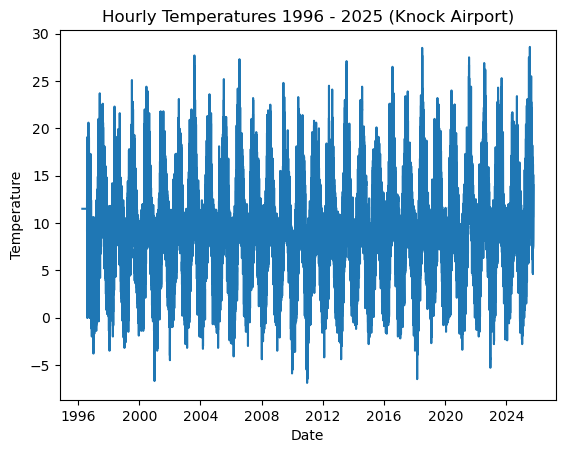

In [7]:
# Plotting the temperature.

# We use numpy to create two arrays, one for our dates and the other for our temperatures on each date(time)
x = np.array(df["date"])
y = np.array(df["temp"])

plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Hourly Temperatures 1996 - 2025 (Knock Airport)")

plt.plot(x,y)
plt.show()

#### Part 1: Plot the Mean Daily Temperature
To do this, we must first decompose our date series/column which contains the year, month, day, and hour for each observation.
Breaking that up into its constituent parts, similar to sorting data according to one column, 
then within that sorted list sort again according to another column,
and within that sorted list sort again according to yet another column and so on.

In our case, we will break out the date, then sort the data by year, then month, and then day.

In [8]:
# Breaking out our date column into its constituent parts  
# This is based on https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
#
df["year"] = df["date"].dt.year
print(f"{(df["year"].head())}\n")

df["month"] = df["date"].dt.month
print(f"{(df["month"].head())}\n")

df["day"] = df["date"].dt.day
print(f"{(df["day"].head())}\n")

df['time'] = df["date"].dt.time
print(f"{(df["time"].head(6))}\n")

# Now let's view all our columns
print(f"{(df.head(6))}\n")

0    1996
1    1996
2    1996
3    1996
4    1996
Name: year, dtype: int32

0    4
1    7
2    7
3    7
4    7
Name: month, dtype: int32

0    10
1    31
2    31
3    31
4    31
Name: day, dtype: int32

0    14:00:00
1    08:00:00
2    09:00:00
3    10:00:00
4    11:00:00
5    12:00:00
Name: time, dtype: object

                 date  temp  year  month  day      time
0 1996-04-10 14:00:00  11.5  1996      4   10  14:00:00
1 1996-07-31 08:00:00  11.5  1996      7   31  08:00:00
2 1996-07-31 09:00:00  11.6  1996      7   31  09:00:00
3 1996-07-31 10:00:00  12.9  1996      7   31  10:00:00
4 1996-07-31 11:00:00  14.5  1996      7   31  11:00:00
5 1996-07-31 12:00:00  14.4  1996      7   31  12:00:00



In [9]:
# I now have my date broken up into separate columns, 
# I can use Pandas groupby function to first group the data by year, then month, then day, 
# and to calculate the mean termperatures for each day

# This method was inspired by Example 3 https://www.geeksforgeeks.org/pandas/python-pandas-dataframe-groupby/ 

df_aggregated_data = df.groupby(["year", "month", "day"]).agg(
    avg_mean_temp = ('temp', 'mean')
    
)

# now to check my data here to see it matches that I calculated in a spreadsheet for the first two days
print(f"{df_aggregated_data.head(20)}")

# I want to output to a csv file so i can assure myself it has done all the dates
df_aggregated_data.to_csv("mean_daily_temps_for_Knock.csv")   

                avg_mean_temp
year month day               
1996 4     10       11.500000
     7     31       12.650000
     8     1        11.666667
           2        12.504167
           3        14.266667
           4        13.987500
           5        11.520833
           6        11.108333
           7        12.633333
           8        13.566667
           9        12.945833
           10       12.850000
           11       13.562500
           12       13.216667
           13       13.929167
           14       14.329167
           15       14.658333
           16       15.508333
           17       15.716667
           18       16.116667


In [10]:
print(f"{df_aggregated_data}")

                avg_mean_temp
year month day               
1996 4     10       11.500000
     7     31       12.650000
     8     1        11.666667
           2        12.504167
           3        14.266667
...                       ...
2025 9     27       10.866667
           28        9.650000
           29       11.416667
           30       13.554167
     10    1        14.000000

[10656 rows x 1 columns]


In [11]:
# Now my column headers are not in order. For simplicity, I will export the data out to a csv file,
# then reimport the data and assign it the headers i want
names = ["year","month", "day","avg_mean_temp"]
df_aggregated_data = pd.read_csv("mean_daily_temps_for_Knock.csv", header=None,names=names,skiprows=2)


In [12]:
# Now to check my headers are all in the right order
print(f"{df_aggregated_data}\n")

       year  month  day  avg_mean_temp
0      1996      7   31      12.650000
1      1996      8    1      11.666667
2      1996      8    2      12.504167
3      1996      8    3      14.266667
4      1996      8    4      13.987500
...     ...    ...  ...            ...
10650  2025      9   27      10.866667
10651  2025      9   28       9.650000
10652  2025      9   29      11.416667
10653  2025      9   30      13.554167
10654  2025     10    1      14.000000

[10655 rows x 4 columns]



In [13]:
# If I want my plot my daily means, I need a column containing daily dates, therefore i need to rejoin my year, month, day into one column.
#  From Gemini it suggested use the concatenation function in Pandas to join all three columns as strings 
df_aggregated_data['daily_date'] = pd.to_datetime(df_aggregated_data['year'].astype(str) + '-' + 
                                  df_aggregated_data['month'].astype(str) + '-' + 
                                  df_aggregated_data['day'].astype(str))
print(f"{df_aggregated_data}\n")


       year  month  day  avg_mean_temp daily_date
0      1996      7   31      12.650000 1996-07-31
1      1996      8    1      11.666667 1996-08-01
2      1996      8    2      12.504167 1996-08-02
3      1996      8    3      14.266667 1996-08-03
4      1996      8    4      13.987500 1996-08-04
...     ...    ...  ...            ...        ...
10650  2025      9   27      10.866667 2025-09-27
10651  2025      9   28       9.650000 2025-09-28
10652  2025      9   29      11.416667 2025-09-29
10653  2025      9   30      13.554167 2025-09-30
10654  2025     10    1      14.000000 2025-10-01

[10655 rows x 5 columns]



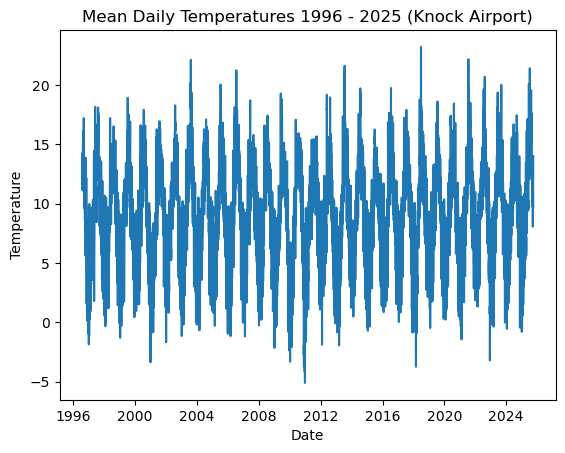

In [14]:
# Plotting the mean temperatures.

# We use numpy to create two arrays, one for our dates and the other for our mean daily temperatures
x = np.array(df_aggregated_data["daily_date"])
y = np.array(df_aggregated_data["avg_mean_temp"])

plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Mean Daily Temperatures 1996 - 2025 (Knock Airport)")

plt.plot(x,y)
plt.show()


#### Part 3: Plot the Mean Monthly Temperature
I will use a similar method to that I used for the mean daily temperature.<br/>
In that case, I used the groupby function to get the mean across the hours data for each day.<br/>
Now, I have daily mean returns so I will use these figures to calculate the mean monthly returns.

In [15]:
# My date is broken up into separate columns, 
# So again I can use Pandas groupby function to first group the data by year, then month,  
# and to calculate the mean temperatures for each month

# This method was inspired by Example 3 https://www.geeksforgeeks.org/pandas/python-pandas-dataframe-groupby/ 

df_aggregated_data2 = df_aggregated_data.groupby(["year", "month"]).agg(
    avg_mean_temp = ('avg_mean_temp', 'mean')
    
)

# now to check my data here to see it matches that I calculated in a spreadsheet for the first two days
print(f"{df_aggregated_data2.head(20)}")

# I want to output to a csv file so i can assure myself it has done all the dates
df_aggregated_data2.to_csv("mean_monthly_temps_for_Knock.csv")   

            avg_mean_temp
year month               
1996 7          12.650000
     8          12.946909
     9          12.174306
     10          9.614113
     11          4.909444
     12          3.209946
1997 1           3.483065
     2           4.990476
     3           6.770833
     4           8.663056
     5          10.246909
     6          11.422500
     7          13.975806
     8          14.792204
     9          11.857639
     10          9.282661
     11          7.298194
     12          5.388441
1998 1           4.132796
     2           6.654018


In [16]:
# Now again my column headers are not in order. For simplicity, I will export the data out to a csv file,
# then reimport the data and assign it the headers i want
names = ["year","month", "avg_mean_monthly_temp"]
df_aggregated_data2 = pd.read_csv("mean_monthly_temps_for_Knock.csv", header=None,names=names,skiprows=2)

In [17]:
# Now to check my headers are all in the right order
print(f"{df_aggregated_data2}\n")

     year  month  avg_mean_monthly_temp
0    1996      8              12.946909
1    1996      9              12.174306
2    1996     10               9.614113
3    1996     11               4.909444
4    1996     12               3.209946
..    ...    ...                    ...
346  2025      6              13.433889
347  2025      7              15.068280
348  2025      8              15.178495
349  2025      9              11.368056
350  2025     10              14.000000

[351 rows x 3 columns]



In [18]:
# If I want my plot my monthly means, I need a column containing monthly dates, therefore i need to rejoin my year and month into one column.
#  Like before, I will use the concatenation function in Pandas to join the two columns as strings 
df_aggregated_data2['monthly_date'] = pd.to_datetime(df_aggregated_data2['year'].astype(str) + '-' + 
                                  df_aggregated_data2['month'].astype(str))
print(f"{df_aggregated_data2}\n")

     year  month  avg_mean_monthly_temp monthly_date
0    1996      8              12.946909   1996-08-01
1    1996      9              12.174306   1996-09-01
2    1996     10               9.614113   1996-10-01
3    1996     11               4.909444   1996-11-01
4    1996     12               3.209946   1996-12-01
..    ...    ...                    ...          ...
346  2025      6              13.433889   2025-06-01
347  2025      7              15.068280   2025-07-01
348  2025      8              15.178495   2025-08-01
349  2025      9              11.368056   2025-09-01
350  2025     10              14.000000   2025-10-01

[351 rows x 4 columns]



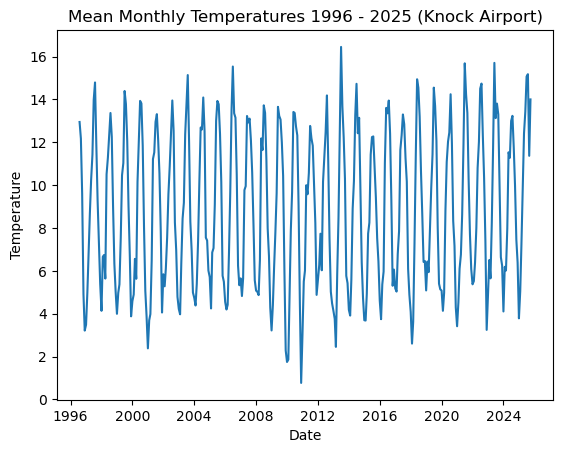

In [20]:
# Plotting the mean monthly temperatures.

# We use numpy to create two arrays, one for our dates and the other for our mean daily temperatures
x = np.array(df_aggregated_data2["monthly_date"])
y = np.array(df_aggregated_data2["avg_mean_monthly_temp"])

plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Mean Monthly Temperatures 1996 - 2025 (Knock Airport)")

plt.plot(x,y)
plt.show()
